In [8]:
sys.path.insert(0, './common')

import seaborn as sns
import qlearning_target_model
import a2c_unite
import ppo_unite
import plot
import matplotlib.pyplot as plt

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

qlearning = qlearning_target_model.QLearning(127, 2, 512)
a2c = a2c_unite.A2C(127, 2, 512)
ppo = ppo_unite.PPO(127, 2, 512)

In [10]:
save_path = './results/final/qlet'
qlearning.set_model_save_path(save_path)
qlearning.load_model()

Model loaded
Training history loaded


In [11]:
save_path = './results/final/a2c'
a2c.set_model_save_path(save_path)
a2c.load_model()

Model loaded
Training history loaded


In [12]:
save_path = './results/final/ppo'
ppo.set_model_save_path(save_path)
ppo.load_model()

Model loaded
Training history loaded


In [13]:
SMOOTH_COUNT = 100
qlearning_smoothed_rewards = plot.smooth_values(qlearning.train_rewards, SMOOTH_COUNT)
a2c_smoothed_rewards = plot.smooth_values(a2c.train_rewards, SMOOTH_COUNT)
ppo_smoothed_rewards = plot.smooth_values(ppo.train_rewards, SMOOTH_COUNT)

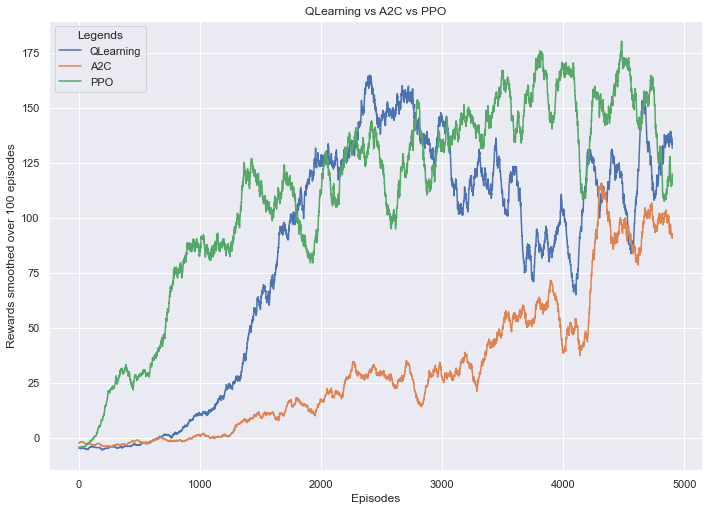

In [14]:
ax = sns.lineplot(data=[qlearning_smoothed_rewards, a2c_smoothed_rewards, ppo_smoothed_rewards])
ax.lines[1].set_linestyle('-')
ax.lines[2].set_linestyle('-')
ax.lines[3].set_linestyle('-')
ax.set_xlabel('Episodes')
ax.set_ylabel('Rewards smoothed over 100 episodes')
plt.title('QLearning vs A2C vs PPO')
plt.legend(labels=["QLearning", "A2C", 'PPO'], title = "Legends")
plt.show()